# Title: Heart Disease Prediction

### Context

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.



| Column  | Description                                                      | Values (Categorical)                                     |
|---------|------------------------------------------------------------------|---------------------------------------------|
| id      | Unique id for each patient                                       |                                             |
| age     | Age of the patient in years                                      |                                           |
| origin  | Place of study                                                   |Cleveland, Hungary, Switzerland, VA Long Beach                                             |
| sex     | Male/Female                                                      |Male, Female                                             |
| cp      | Chest pain type                                                  | Typical Angina, Atypical Angina, Non-Anginal, Asymptomatic|
| trestbps| Resting blood pressure (in mm Hg on admission to the hospital)   |                                             |
| chol    | Serum cholesterol in mg/dl                                       |                                             |
| fbs     | Fasting blood sugar (> 120 mg/dl)                                |                                             |
| restecg | Resting electrocardiographic results                             | Normal, ST-T Abnormality, LV Hypertrophy    |
| thalach | Maximum heart rate achieved                                      |                                             |
| exang   | Exercise-induced angina (True/False)                             | True, False                                 |
| oldpeak | ST depression induced by exercise relative to rest               |                                             |
| slope   | Slope of the peak exercise ST segment                            |                                             |
| ca      | Number of major vessels (0-3) colored by fluoroscopy             | 0, 1, 2, 3                                  |
| thal    | Thalassemia                                                      | Normal, Fixed Defect, Reversible Defect    |
| num     | Predicted attribute                                              |0, 1, 2, 3, 4                                             |


In [64]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, precision_score, r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df.shape

(920, 16)

### Summary Statistics

In [6]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


#### Correlation Matrix of Numeric Columns

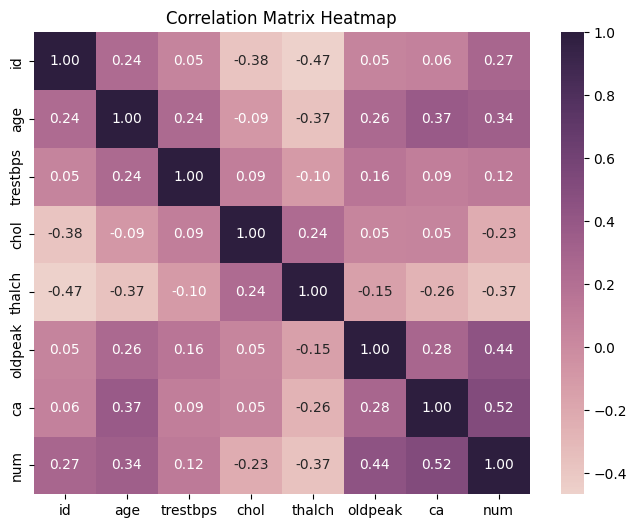

In [7]:
df_num = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
correlation_matrix  = df[df_num].corr()
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


Unique values in Categorical Columns

In [9]:
for col in df.columns:
    if df[col].dtype == 'object':
        a = df[col].unique()
        print(a)

['Male' 'Female']
['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
[True False nan]
['lv hypertrophy' 'normal' 'st-t abnormality' nan]
[False True nan]
['downsloping' 'flat' 'upsloping' nan]
['fixed defect' 'normal' 'reversable defect' nan]


In [10]:
df['num'].unique()

array([0, 2, 1, 3, 4])

In [11]:
df['age'].min(), df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

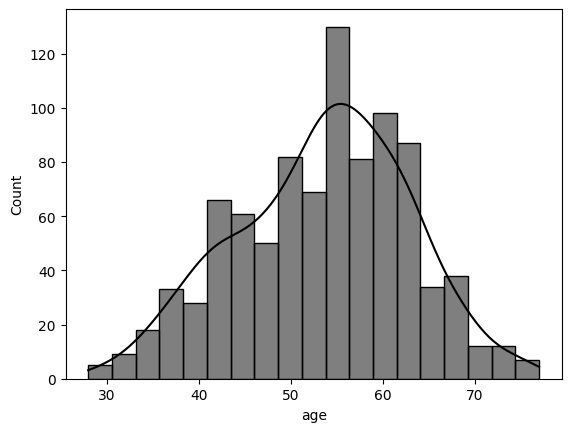

In [15]:
sns.histplot(df, x = 'age', kde= True, color='black')

In [16]:
a = df['age'].mode()[0]
b = df['age'].mean()
c = df['age'].median()

print(f"Mode of Age: {a},\nMean of Age: {b}, \nMedian of Age: {c}")

Mode of Age: 54,
Mean of Age: 53.51086956521739, 
Median of Age: 54.0


In [18]:
fig = px.histogram(df, x = 'age', color='sex')
fig.update_layout(width=800, height=400, margin=dict(l=50, r=50, t=50, b=50))
fig.show()


In [19]:
df['sex'].value_counts()

Male      726
Female    194
Name: sex, dtype: int64

In [20]:
df['dataset'].value_counts()

Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: dataset, dtype: int64


<Axes: xlabel='dataset', ylabel='count'>

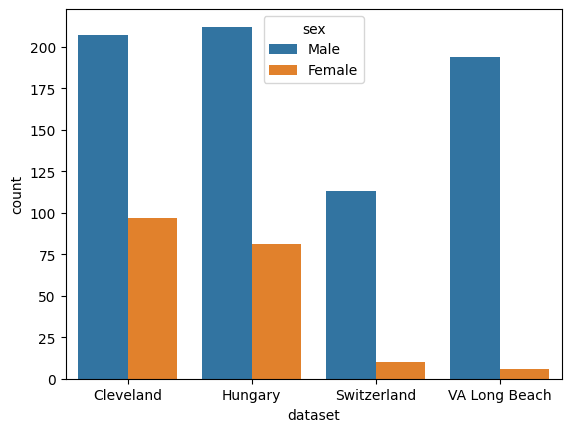

In [21]:
print(df.groupby('sex')['dataset'].value_counts())
sns.countplot(df, x = 'dataset', hue= 'sex')

In [25]:
print(f"Mean of Data set: {df.groupby('dataset')['age'].mean()}")
print('-----------------------------')
print(f"Median of Data set: {df.groupby('dataset')['age'].median()}")
print('-----------------------------')
print(f"Mode of Data set: {df.groupby('dataset')['age'].agg(pd.Series.mode)}")

Mean of Data set: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
-----------------------------
Median of Data set: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-----------------------------
Mode of Data set: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


#### Lets explore chest pain (ca) column

In [26]:
fig1 = px.histogram(df, x = 'age', color = 'cp')
fig1.update_layout(width=800, height=400, margin=dict(l=50, r=50, t=50, b=50))

#### Lets Explore thalch column

In [27]:
df['thalch'].describe()

count    865.000000
mean     137.545665
std       25.926276
min       60.000000
25%      120.000000
50%      140.000000
75%      157.000000
max      202.000000
Name: thalch, dtype: float64

In [28]:
df['thalch'].corr(df['num'])

-0.36626539944425285

## *Dealing with Outliers*

In [29]:
df = df.drop('id', axis = 1)

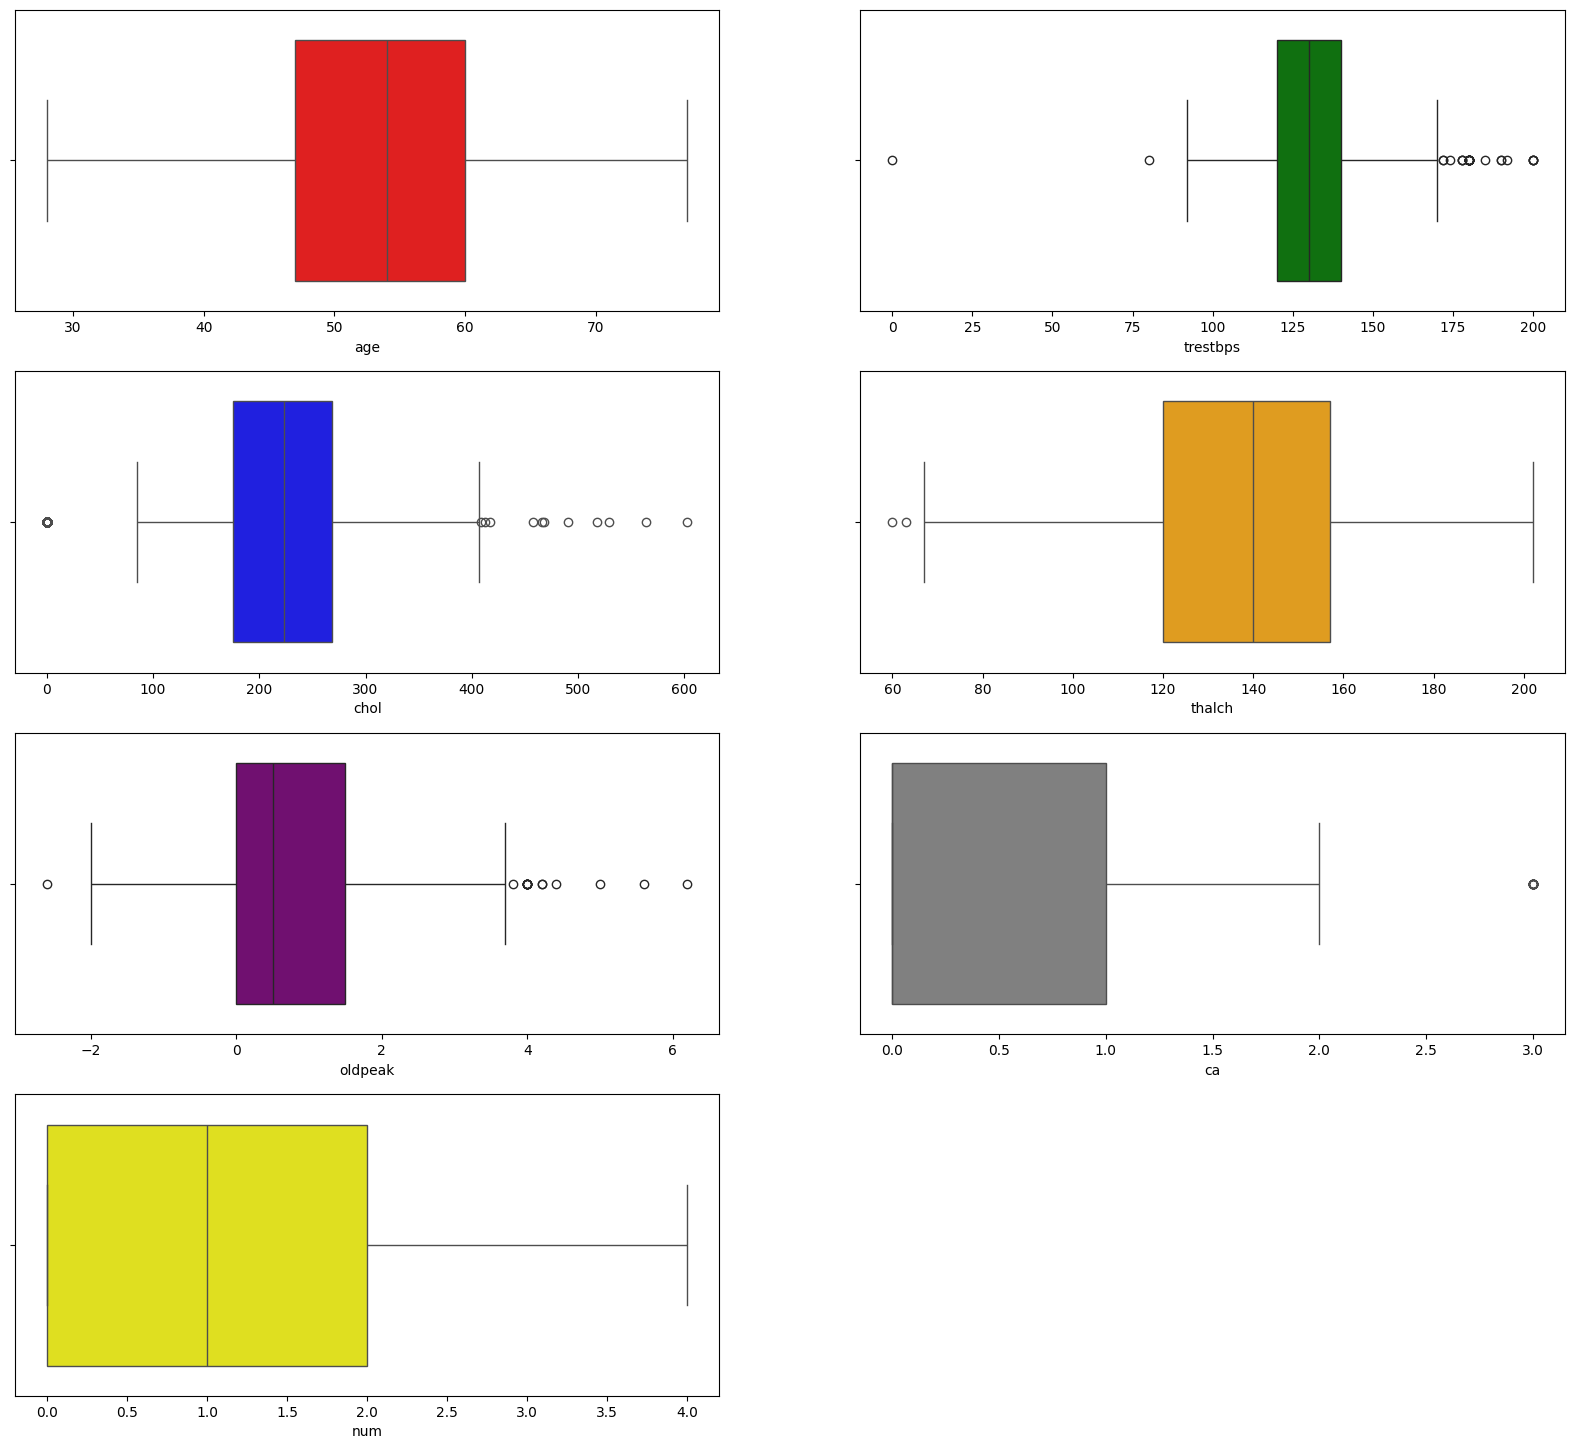

In [30]:

numerical_columns = [col for col in df.columns if df[col].dtype != 'object']

plt.figure(figsize=(20, 18))

colors = ['red', 'green', 'blue','orange', 'purple', 'grey', 'yellow']

for i, col in enumerate(numerical_columns):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x = df[col], color = colors[i])
plt.show()

## *Data Distributions*

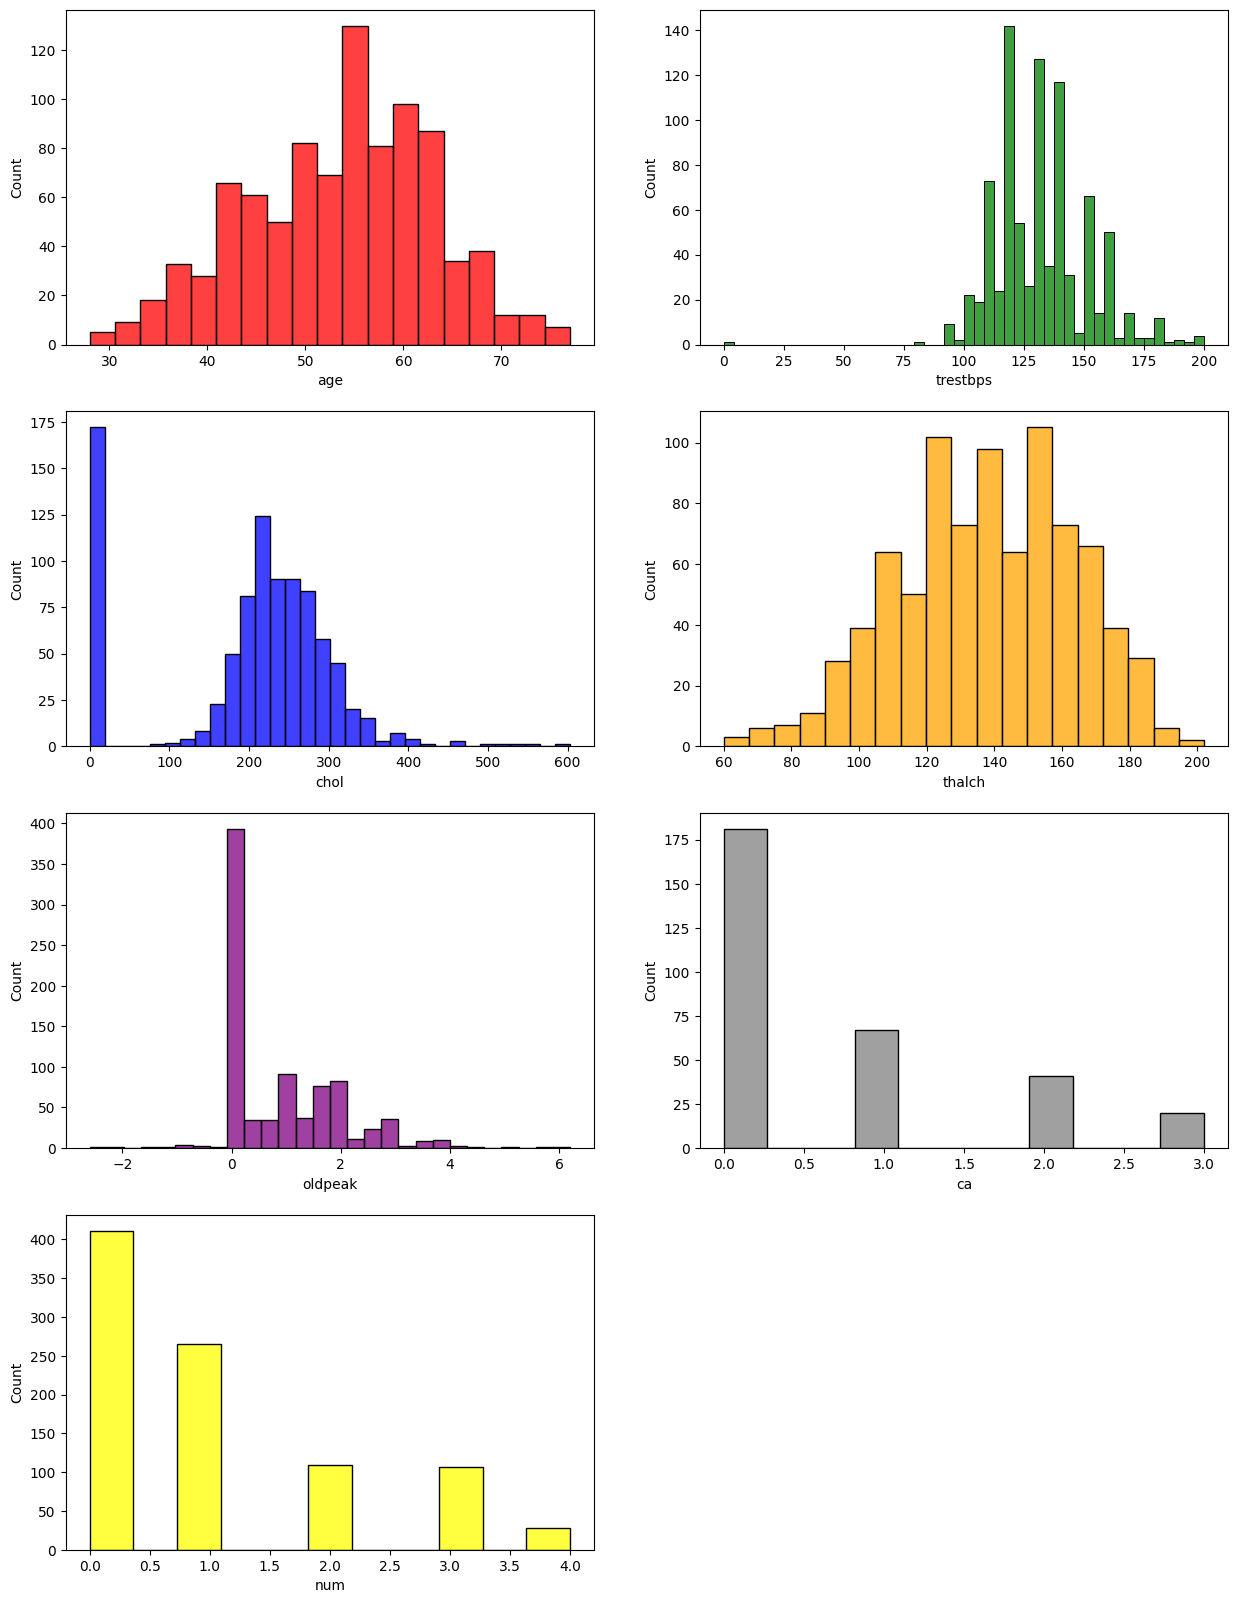

In [31]:
plt.figure(figsize=(15, 20))

colors = ['red', 'green', 'blue','orange', 'purple', 'grey', 'yellow']

for i, col in enumerate(numerical_columns):
    plt.subplot(4, 2, i+1)
    sns.histplot(x = df[col], color = colors[i])
plt.show()

In [32]:
fig = px.box(df, y = numerical_columns, color_discrete_sequence=colors)
fig.update_layout(title = "Box Plots for Numeric Columns", height = 1000, width = 1000)
fig.show()

In [33]:
# there is an outlier in trestbps

df[df['trestbps'] == 0]

# Lets remove this row
df = df[df['trestbps'] != 0]

### Checking Missing Values

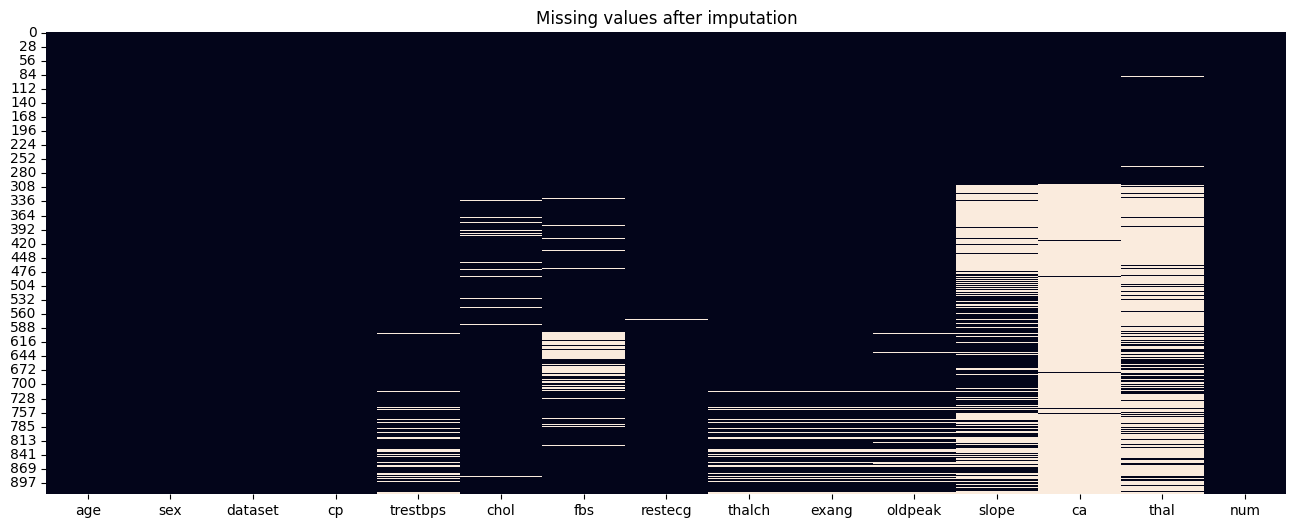

In [34]:
# create a heatmap for df to check missing values
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing values after imputation')
plt.show()

In [35]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

ca          66.376496
thal        52.774755
slope       33.623504
fbs          9.793254
oldpeak      6.746464
trestbps     6.420022
thalch       5.984766
exang        5.984766
chol         3.264418
restecg      0.217628
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       919 non-null    int64  
 1   sex       919 non-null    object 
 2   dataset   919 non-null    object 
 3   cp        919 non-null    object 
 4   trestbps  860 non-null    float64
 5   chol      889 non-null    float64
 6   fbs       829 non-null    object 
 7   restecg   917 non-null    object 
 8   thalch    864 non-null    float64
 9   exang     864 non-null    object 
 10  oldpeak   857 non-null    float64
 11  slope     610 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       919 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 114.9+ KB


In [37]:
# Impute Missing values through simple imputer

cat_imputer = SimpleImputer(strategy='most_frequent')
cat_columns = ['fbs', 'exang', 'restecg']

df[cat_columns] = cat_imputer.fit_transform(df[cat_columns])

num_imputer = IterativeImputer(max_iter=10, random_state=42)
num_columns = ['oldpeak', 'trestbps', 'thalch', 'chol']

df[num_columns] = num_imputer.fit_transform(df[num_columns])

In [38]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

ca          66.376496
thal        52.774755
slope       33.623504
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
chol         0.000000
fbs          0.000000
restecg      0.000000
thalch       0.000000
exang        0.000000
oldpeak      0.000000
num          0.000000
dtype: float64

In [39]:
df_clean = df.dropna()
df_missing = df[df.isna().any(axis=1)]

In [40]:
percentage_distribution = df_clean['slope'].value_counts(normalize=True) * 100
percentage_distribution = percentage_distribution.round(2)
print(percentage_distribution)


flat           46.49
upsloping      46.49
downsloping     7.02
Name: slope, dtype: float64


In [41]:
df_clean.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


While training the model, we need to remove the columns with missing values in df_missing dataframe.
This is because when we will predict the missing column the model will not ask for the missing value columns.

If we train the model with columns that have missing values in df_missing, when we will try to predict, the model will ask for those columns.

In [42]:
def predictions(target, drop_c):
    X = df_clean.drop(drop_c, axis = 1)
    y = df_clean[target]

    le = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = le.fit_transform(X[col])

    model = RandomForestClassifier()

    model.fit(X, y)

    # Perform k-fold cross-validation with k=5
    kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

    print("Scores for each fold:", scores)
    print("Mean score:", scores.mean())

    # Plot the results
    plt.figure(figsize=(8,6))
    plt.plot(range(1,7), scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=12)
    plt.title('K-Fold Cross-Validation Results')
    plt.xlabel('Fold Number')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1.0])
    plt.show()

    return model

Scores for each fold: [0.64       0.78       0.66       0.78       0.7        0.67346939]
Mean score: 0.7055782312925171


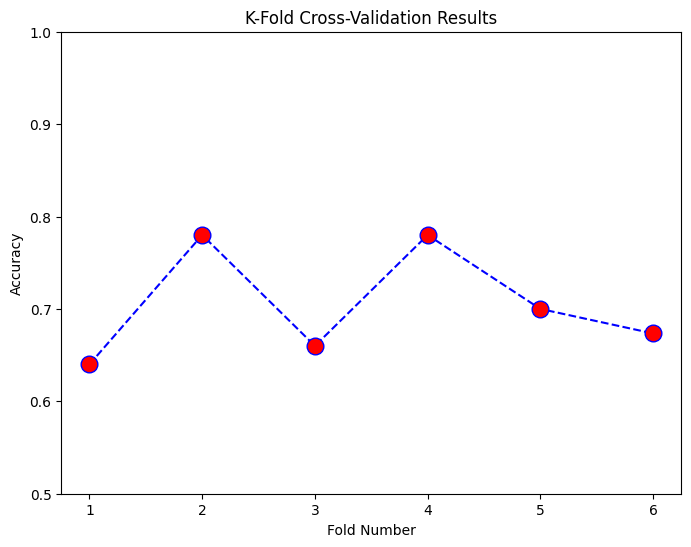

In [43]:
model_slope = predictions('slope', ['slope', 'thal', 'ca'])

Scores for each fold: [0.64       0.72       0.74       0.72       0.76       0.67346939]
Mean score: 0.7089115646258501


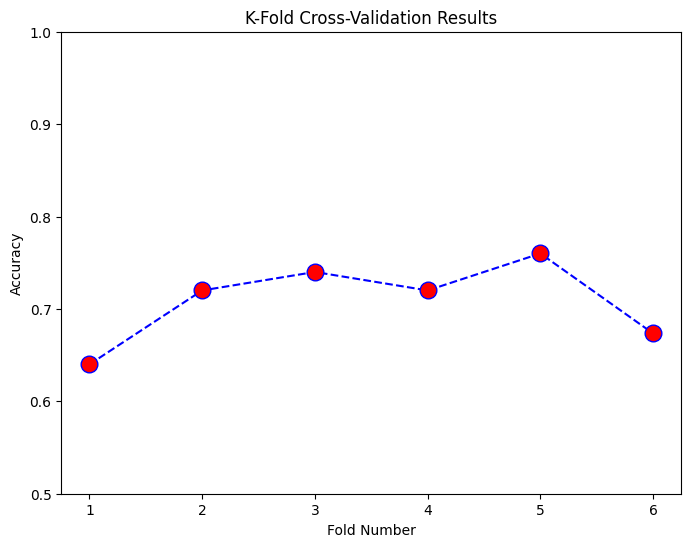

In [44]:
model_thal = predictions('thal', ['slope', 'thal', 'ca'])

Scores for each fold: [0.6        0.64       0.68       0.64       0.62       0.63265306]
Mean score: 0.6354421768707483


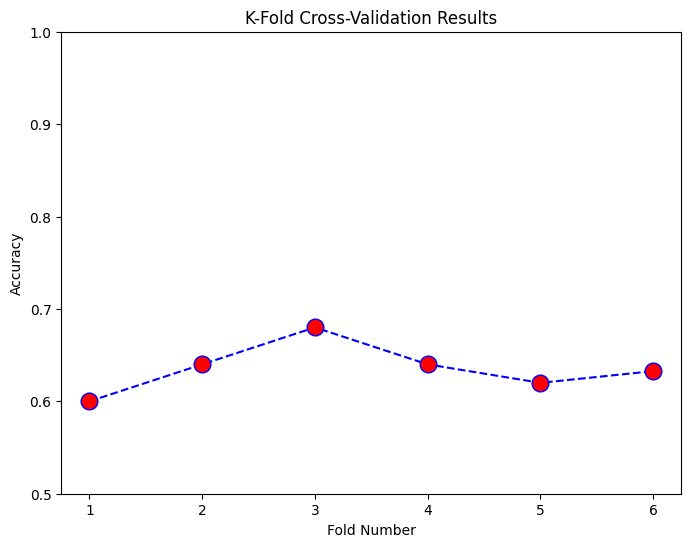

In [45]:
model_ca = predictions('ca', ['slope', 'thal', 'ca'])

### Our Models are ready, lets use them to predict the missing values

In [46]:
df_missing.isnull().sum()

age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope       309
ca          610
thal        485
num           0
dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder

def predict_missing_values(df_missing, model, target_column, exclude_columns=[]):
    # Prepare encoded DataFrame
    df_encoded = df_missing.drop(exclude_columns + [target_column], axis=1, errors='ignore')

    # Label encode categorical columns
    le = LabelEncoder()
    for col in df_encoded.columns:
        if df_encoded[col].dtype == 'object':
            df_encoded[col] = le.fit_transform(df_encoded[col])

    # Predict missing values
    features_to_predict = df_encoded.drop([target_column], axis=1, errors='ignore')
    y_pred = model.predict(features_to_predict)

    # Replace missing values in the original DataFrame
    df_missing[target_column] = y_pred

# Usage:
predict_missing_values(df_missing, model_slope, 'slope', exclude_columns=['thal', 'ca'])


In [48]:
predict_missing_values(df_missing, model_thal, 'thal', exclude_columns=['ca', 'slope'])
predict_missing_values(df_missing, model_ca, 'ca', exclude_columns=['thal', 'slope'])

In [49]:
df_missing.isnull().sum() / len(df) * 100

age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

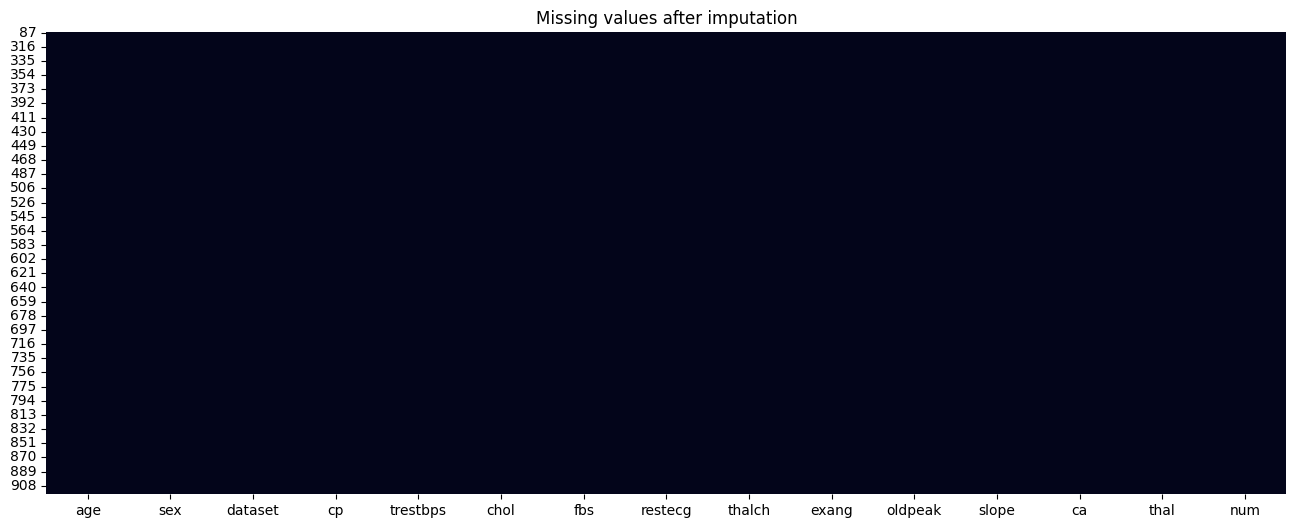

In [50]:
# create a heatmap for df to check missing values
plt.figure(figsize=(16, 6))
sns.heatmap(df_missing.isnull(), cbar=False)
plt.title('Missing values after imputation')
plt.show()

In [51]:
# Concatenate the two dataframes
df_complete = pd.concat([df_missing, df_clean], axis=0)

# Shape of the Dataframe
print("The shape of the complete dataframe is: ", df_complete.shape)

df_complete.head()

The shape of the complete dataframe is:  (919, 15)


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
87,53,Female,Cleveland,non-anginal,128.0,216.0,False,lv hypertrophy,115.0,False,0.0,upsloping,0.0,normal,0
166,52,Male,Cleveland,non-anginal,138.0,223.0,False,normal,169.0,False,0.0,upsloping,0.0,normal,0
192,43,Male,Cleveland,asymptomatic,132.0,247.0,True,lv hypertrophy,143.0,True,0.1,upsloping,0.0,reversable defect,1
266,52,Male,Cleveland,asymptomatic,128.0,204.0,True,normal,156.0,True,1.0,upsloping,2.0,reversable defect,2
287,58,Male,Cleveland,atypical angina,125.0,220.0,False,normal,144.0,False,0.4,upsloping,0.0,reversable defect,0


In [52]:
df_complete.isnull().sum() / len(df) * 100

age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

In [53]:
df = df_complete

In [54]:
df = df.drop(columns=['dataset'], axis =1)

In [55]:
df.shape

(919, 14)

------

<span style="color: teal; font-size: 300%; font-weight: bold;">Machine Learning</span>

### Log Transformation

In [56]:
df['age'] = np.log(df['age'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
87,3.970292,Female,non-anginal,128.0,216.0,False,lv hypertrophy,115.0,False,0.0,upsloping,0.0,normal,0
166,3.951244,Male,non-anginal,138.0,223.0,False,normal,169.0,False,0.0,upsloping,0.0,normal,0
192,3.761200,Male,asymptomatic,132.0,247.0,True,lv hypertrophy,143.0,True,0.1,upsloping,0.0,reversable defect,1
266,3.951244,Male,asymptomatic,128.0,204.0,True,normal,156.0,True,1.0,upsloping,2.0,reversable defect,2
287,4.060443,Male,atypical angina,125.0,220.0,False,normal,144.0,False,0.4,upsloping,0.0,reversable defect,0


In [57]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [61]:
#Spliting Data

X = df.drop('num', axis= 1)
y = df['num']

scaler = MinMaxScaler()
columns_to_scale = ['trestbps', 'thalch', 'chol']
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])


sex_encoder = LabelEncoder()
dataset_encoder = LabelEncoder()
cp_encoder = LabelEncoder()
fbs_encoder = LabelEncoder()
restecg_encoder = LabelEncoder()
exang_encoder = LabelEncoder()
slope_encoder = LabelEncoder()
thal_encoder = LabelEncoder()


X['sex'] = sex_encoder.fit_transform(X['sex'])
X['cp'] = cp_encoder.fit_transform(X['cp'])
X['fbs'] = fbs_encoder.fit_transform(X['fbs'])
X['restecg'] = restecg_encoder.fit_transform(X['restecg'])
X['exang'] = exang_encoder.fit_transform(X['exang'])
X['slope'] = slope_encoder.fit_transform(X['slope'])
X['thal'] = thal_encoder.fit_transform(X['thal'])

In [62]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
87,3.970292,0,2,0.400000,0.358209,0,0,0.387324,0,0.0,2,0.0,1
166,3.951244,1,2,0.483333,0.369818,0,1,0.767606,0,0.0,2,0.0,1
192,3.761200,1,0,0.433333,0.409619,1,0,0.584507,1,0.1,2,0.0,2
266,3.951244,1,0,0.400000,0.338308,1,1,0.676056,1,1.0,2,2.0,2
287,4.060443,1,1,0.375000,0.364842,0,1,0.591549,0,0.4,2,0.0,2


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)


Following are the models that we will be using to for the classification task

- Random Forest Classifier  
- KNN
- XGBoost
- Adaboost
- SVC
- Gradient Boost Classifier

In [78]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:

    skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=skf)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # Fit the pipeline on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name
        v = report
# Retrieve the best model
print("Best Model:", best_model)
print("Classification Report:\n", v)



Model: Random Forest
Cross-validation Accuracy: 0.6421986760851215
Test Accuracy: 0.6793478260869565

Model: Gradient Boosting
Cross-validation Accuracy: 0.6612132924607935
Test Accuracy: 0.6467391304347826

Model: Support Vector Machine
Cross-validation Accuracy: 0.6434315162823759
Test Accuracy: 0.657608695652174

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.6258496601359457
Test Accuracy: 0.6304347826086957

Model: Ada Boost
Cross-validation Accuracy: 0.6068017237549425
Test Accuracy: 0.5978260869565217

Model: XG Boost
Cross-validation Accuracy: 0.6381225287662713
Test Accuracy: 0.6467391304347826

Best Model: Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        84
           1       0.63      0.70      0.66        53
           2       0.32      0.42      0.36        19
           3       0.33      0.14      0.20        21
           4       0.00      0.00      0.00         7

   

------

<span style="color: teal; font-size: 300%; font-weight: bold;">Outputs</span>

`Best Model`

- After comparing different models the best model selected is Random Forest.
- The overall accuracy of the model on the test data is 69%.

*Class-wise Performance:*

Class 0: High precision and recall (0.88 and 0.91), indicating good performance.\
Class 1: Moderate precision and recall (0.58 and 0.73), suggesting decent but not excellent performance.\
Class 2: Lower precision and recall (0.41 and 0.32), indicating challenges in correctly identifying this class.\
Class 3: Moderate precision and recall (0.60 and 0.46), similar to Class 1.\
Class 4: The model struggles to predict Class 4, as both precision and recall are 0.
